<img src="figures/u_peque.png" width="300" height="200">

# Ayudantía 1 - Machine Learning - Introducción a Scikit-learn

<p><img align="left" style="padding-right:10px;" width="100" height="150" src="figures/rodrigo.jpg">
Profesor: 
Rodrigo de la Fuente,
Phd. of Industrial Engineering,
Noth Carolina State University,
rodelafu@udec.cl<p>

<p><img align="left" style="padding-right:10px;" width="100" height="150" src="figures/daniel.png">
Ayudante: 
Daniel Neira,
Estudiante Magíster Ingeniería Industrial,
Universidad de Concepción,
danieneira@udec.cl</p>

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*Este Notebook tiene contenido del libro [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; todo el contenido en inglés se encuentra [en GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*El texto esta disponible según la  [licencia CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), y el código según la [licencia MIT](https://opensource.org/licenses/MIT). Este notebook persigue fines academicos y por tanto respaldamos la [compra del libro](http://shop.oreilly.com/product/0636920034919.do)!*

## Introducción a Scikit-Learn

Existen varias librerías Python que proporcionan implementaciones sólidas de una gama de algoritmos de *machine learning*. Uno de los más conocidos es [Scikit-Learn](http://scikit-learn.org), un paquete que proporciona versiones eficientes de un gran número de algoritmos comunes. Scikit-Learn se caracteriza por ser una API limpia, uniforme y racionalizada, así como por una documentación en línea muy útil y completa. Un beneficio de esta uniformidad es que una vez que se entiende el uso básico y la sintaxis de Scikit-Learn para un tipo de modelo, el cambio a un nuevo modelo o algoritmo es muy sencillo.

Esta sección proporciona una visión general de la API de Scikit-Learn; una sólida comprensión de estos elementos de la API formará la base para entender la discusión práctica más profunda de los algoritmos y enfoques de aprendizaje automático en las siguientes ayudantías.

Comenzaremos cubriendo la *representación de datos* en Scikit-Learn, luego cubriendo la API del *Estimador*, y finalmente pasaremos por un ejemplo más interesante del uso de estas herramientas para explorar un conjunto de imágenes de dígitos escritos a mano.

### Datos en forma de tabla

Una tabla básica es una cuadrícula bidimensional de datos, en la que las filas representan elementos individuales del set de datos y las columnas representan cantidades relacionadas con cada uno de estos elementos. Por ejemplo, considere el conjunto de [datos de Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set), que fue analizado por Ronald Fisher en 1936. Podemos descargar este conjunto de datos en forma de un Pandas ``DataFrame`` utilizando la biblioteca [seaborn](http://seaborn.pydata.org/):

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Aquí cada fila de los datos se refiere a una sola flor observada, y el número de filas es el número total de flores en el conjunto de datos. En general, nos referiremos a las *filas* de la matriz como *muestras*, y al número de filas como `n_muestras`.

Asimismo, cada columna de los datos se refiere a un dato cuantitativo particular que describe cada muestra. En general, nos referiremos a las *columnas* de la matriz como *características*, y al número de columnas como `n_características`.

#### Matriz de características
Este diseño de tabla deja claro que la información puede ser pensada como una matriz numérica bidimensional, a la que llamaremos *matriz de características*. Por convención, esta matriz de características se almacena a menudo en una variable llamada `X`. Se supone que la matriz de características es bidimensional, con forma `[n_muestras, n_características]`, y se encuentra más a menudo en una matriz NumPy o en un `DataFrame` de Pandas, aunque algunos modelos Scikit-Learn también aceptan matrices dispersas (o ralas) de SciPy.

Las muestras (es decir, las filas) se refieren siempre a los objetos individuales descritos por el set de datos. Por ejemplo, la muestra puede ser una flor, una persona, un documento, una imagen, un archivo de sonido, un vídeo, un objeto astronómico o cualquier otra cosa que pueda describir con un conjunto de mediciones cuantitativas.

Las características (es decir, las columnas) siempre se refieren a las distintas observaciones que describen cada muestra de manera cuantitativa. Las características son generalmente de valor real, pero pueden ser booleanas o de valor discreto en algunos casos.

#### Matriz *target*
Además de la matriz de características ``X``, también trabajamos generalmente con una matriz de etiquetas o de objetivos, a la que por convención llamaremos ``y``. La matriz de objetivos suele ser unidimensional, con longitud `n_muestras`, y generalmente está contenida en una matriz NumPy o en una ``Serie`` de Pandas. La matriz de destino puede tener valores numéricos continuos o clases/etiquetas discretas. Mientras que algunos estimadores de Scikit-Learn manejan múltiples valores objetivo en la forma de una matriz de objetivos bidimensional `[n_muestras, n_objetivos]`, trabajaremos principalmente con el caso común de una matriz de objetivos unidimensional.

A menudo, un punto de confusión es la diferencia entre la matriz de destino y las otras columnas de características. La característica distintiva del arreglo de blancos es que normalmente es la cantidad que queremos predecir a partir de los datos: en términos estadísticos, es la variable dependiente. Por ejemplo, en los datos anteriores podemos desear construir un modelo que pueda predecir las especies de flores basado en las otras medidas; en este caso, la columna de especies sería considerada como la matriz objetivo.

Con esta matriz de objetivos en mente, podemos usar Seaborn (la visualización con Seaborn, Pandas y Matplotlib la veremos dentro del curso) para visualizar convenientemente los datos:

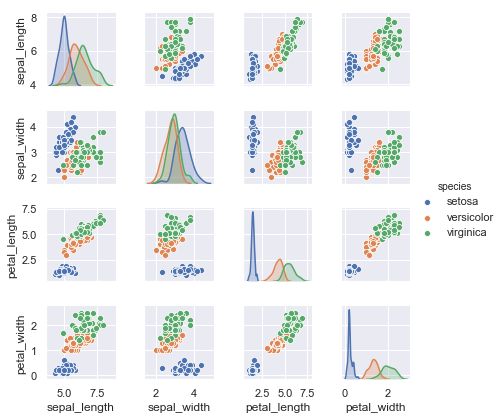

In [5]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

Para su uso en Scikit-Learn, extraeremos la matriz de características y la matriz de destino del ``DataFrame``, lo cual podemos hacer usando algunas de las operaciones de Pandas ``DataFrame`` (las cuales veremos con mayor profundidad en las proximas ayudantías):

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

Para resumir, la disposición prevista de características y valores previstos se visualiza en el siguiente diagrama:

![](figures/05.02-samples-features.png)

Con estos datos correctamente formateados, podemos pasar a considerar la API del estimador de Scikit-Learn:

## API del Estimador de Scikit-Learn

El Scikit-Learn API está diseñado con los siguientes principios rectores en mente, como se describe en el documento [Scikit-Learn API](http://arxiv.org/abs/1309.0238):

- *Consistencia*: Todos los objetos comparten una interfaz común extraída de un conjunto limitado de métodos, con una documentación coherente.

- *Inspección*: Todos los valores de parámetros especificados se exponen como atributos públicos.

- *Jerarquía de objetos limitada*: Sólo los algoritmos están representados por las clases Python; los conjuntos de datos están representados en formatos estándar (matrices NumPy, Pandas `DataFrames`, matrices dispersas de SciPy) y los nombres de los parámetros utilizan cadenas Python estándar.

- *Composición*: Muchas tareas de aprendizaje de la máquina pueden ser expresadas como secuencias de algoritmos más fundamentales, y Scikit-Learn hace uso de esto siempre que es posible.

- *Valores predeterminados razonables*: Cuando los modelos requieren parámetros especificados por el usuario, la biblioteca define un valor por defecto apropiado.

En la práctica, estos principios hacen que Scikit-Learn sea muy fácil de usar, una vez que se entienden los principios básicos. Cada algoritmo de aprendizaje de máquinas en Scikit-Learn se implementa a través del Estimator API, que proporciona una interfaz consistente para una amplia gama de aplicaciones de aprendizaje de máquinas.

### Conceptos básicos de la API
Lo más común es que los pasos para usar la API del estimador Scikit-Learn sean los siguientes (veremos un puñado de ejemplos detallados en las secciones que siguen).
1. Elija una clase de modelo importando la clase de estimador apropiada de Scikit-Learn.
2. Elija los hiperparámetros del modelo instanciando esta clase con los valores deseados.
3. Organice los datos en una matriz de características y en un vector objetivo siguiendo la discusión anterior.
4. Ajuste el modelo a sus datos llamando al método fit() de la instancia de modelo.
5. Aplicar el Modelo a los nuevos datos:
    - Para el aprendizaje supervisado, a menudo predecimos etiquetas para datos desconocidos utilizando el método ``predict()``.
    - Para el aprendizaje no supervisado, a menudo transformamos o inferimos propiedades de los datos usando el método ``transform()`` o ``predict()``.

A continuación se presentan algunos ejemplos sencillos de aplicación de métodos de aprendizaje supervisados y no supervisados.

### Ejemplo de aprendizaje supervisado: Regresión lineal simple
Como ejemplo de este proceso, consideremos una regresión lineal simple, es decir, el caso común de ajustar una línea a datos $(x,y)$. Usaremos los siguientes datos simples para nuestro ejemplo de regresión:

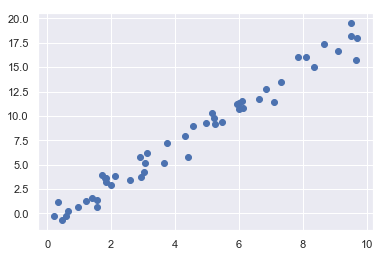

In [6]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

Con estos datos en su lugar, podemos utilizar la receta descrita anteriormente. Vamos a repasar el proceso:

####  1. Elija una clase de modelo

En Scikit-Learn, cada clase de modelo está representada por una clase Python.
Así, por ejemplo, si queremos calcular un modelo de regresión lineal simple, podemos importar la clase de regresión lineal:

In [7]:
from sklearn.linear_model import LinearRegression

Tenga en cuenta que también existen otros modelos de regresión lineal más generales; puede leer más sobre ellos en la documentación del módulo [sklearn.linear_model](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Elija los hiperparámetros del modelo

Un punto importante es que una clase de modelo no es lo mismo que una instancia de un modelo.

Una vez que nos hemos decidido por nuestra clase de modelo, todavía hay algunas opciones disponibles para nosotros. Dependiendo de la clase de modelo con la que estamos trabajando, es posible que necesitemos responder a una o más preguntas como las siguientes:

- ¿Nos gustaría ajustarnos al offset (es decir, a la intersección *y*)?
- ¿Nos gustaría que el modelo se normalizara?
- ¿Nos gustaría preprocesar nuestras características para añadir flexibilidad al modelo?
- ¿Qué grado de regularización nos gustaría utilizar en nuestro modelo?
- ¿Cuántos componentes del modelo nos gustaría utilizar?

Estos son ejemplos de las elecciones importantes que deben hacerse una vez seleccionada la clase de modelo. Estas opciones se representan a menudo como *hiperparámetros*, o parámetros que se deben establecer antes de que el modelo se ajuste a los datos. 
En Scikit-Learn, los hiperparámetros se eligen pasando valores en la instanciación del modelo. Exploraremos cómo puede motivar cuantitativamente la elección de hiperparámetros en Hiperparámetros y Validación de modelos.

Para nuestro ejemplo de regresión lineal, podemos instanciar la clase ``LinearRegression`` y especificar que nos gustaría ajustar la intercepción usando el hiperparámetro ``fit_intercept``:

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Ten en cuenta que cuando el modelo es instanciado, la única acción es el almacenamiento de estos valores de hiperparámetro. En particular, todavía no hemos aplicado el modelo a ningún dato: la API de Scikit-Learn hace una distinción muy clara entre la *elección del modelo* y la *aplicación del modelo a los datos*.

#### 3. Ordenar los datos en una matriz de características y vector de destino

Anteriormente detallamos la representación de datos de Scikit-Learn, que requiere una matriz de características bidimensionales y una matriz de objetivos unidimensional. 
Aquí nuestra variable objetivo ``y`` ya está en la forma correcta (una matriz de longitud-``n_muestras``), pero necesitamos manejar los datos ``x`` para hacer una matriz de tamaño``[n_muestras, n_características]``. 
En este caso, esto equivale a una simple *reshape* de la matriz unidimensional:

In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Ajuste el modelo a sus datos
Ahora es el momento de aplicar nuestro modelo a los datos. Esto se puede hacer con el método ``fit()`` del modelo:

In [10]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Este comando ``fit()`` hace que se realicen varios cálculos internos dependientes del modelo, y los resultados de estos cálculos se almacenan en atributos específicos del modelo que el usuario puede explorar. 
En Scikit-Learn, por convención todos los parámetros del modelo que se aprendieron durante el proceso ``fit()`` tienen subrayados al final; por ejemplo, en este modelo lineal, tenemos lo siguiente:

In [11]:
model.coef_

array([1.9776566])

In [12]:
model.intercept_

-0.9033107255311164

Estos dos parámetros representan la pendiente y la intercepción del ajuste lineal simple a los datos. Comparando con la definición de los datos, vemos que están muy cerca de la pendiente de entrada de 2 y la intercepción de -1.

Una pregunta que surge con frecuencia se refiere a la incertidumbre en tales parámetros internos del modelo. 
En general, Scikit-Learn no proporciona herramientas para sacar conclusiones de los parámetros internos del modelo: interpretar los parámetros del modelo es mucho más una pregunta de *modelado estadístico* que una pregunta de *machine learning*. 
*Machine learning* se centra más bien en lo que *predice* el modelo. 
Si desea profundizar en el significado de los parámetros de ajuste dentro del modelo, existen otras herramientas disponibles, incluido el [paquete Python de Statsmodels](http://statsmodels.sourceforge.net/).

#### 5. Predecir etiquetas para datos desconocidos
Una vez que el modelo es entrenado, la tarea principal del aprendizaje supervisado de la máquina es evaluarla en base a lo que dice sobre los nuevos datos que no formaban parte del conjunto de entrenamiento. En Scikit-Learn, esto se puede hacer usando el método ``predict()``. Para este ejemplo, nuestros "nuevos datos" serán una cuadrícula de valores *x*, y nos preguntaremos qué valores *y* predice el modelo:

In [13]:
xfit = np.linspace(-1, 11)

Como antes, necesitamos coaccionar estos valores de *x* en una matriz de características ``[n_muestras, n_características]``, después de lo cual podemos alimentar al modelo:

In [14]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finalmente, visualicemos los resultados trazando primero los datos sin procesar, y luego este modelo encaja:

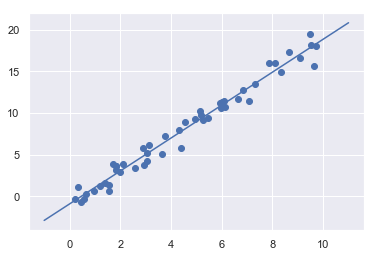

In [15]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Típicamente la eficacia del modelo se evalúa comparando sus resultados con alguna línea de base conocida, como veremos en el siguiente ejemplo

### Ejemplo de aprendizaje supervisado: Clasificación del iris

Echemos un vistazo a otro ejemplo de este proceso, usando el conjunto de datos de Iris que discutimos anteriormente. 
Nuestra pregunta será la siguiente: dado un modelo entrenado en una parte de los datos del Iris, ¿qué tan bien podemos predecir las etiquetas restantes?

Para esto,usaremos un modelo generativo extremadamente simple conocido como *Gaussian naive Bayes*, el cual procede asumiendo que cada clase se dibuja a partir de una distribución gaussiana alineada con el eje. Debido a que es tan rápido y no tiene hiperparámetros para elegir, el *Gaussian naive Bayes* es a menudo un buen modelo para usar como clasificación de línea de base, antes de explorar si las mejoras pueden ser encontradas a través de modelos más sofisticados.

Nos gustaría evaluar el modelo en base a datos que no ha visto antes, por lo que dividiremos los datos en un *conjunto de entrenamiento* y un *conjunto de pruebas*. 
Esto podría hacerse a mano, pero es más conveniente utilizar la función de utilidad ``train_test_split``:

In [16]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Con los datos organizados, podemos seguir nuestra receta para predecir las etiquetas:

In [17]:
from sklearn.naive_bayes import GaussianNB # 1. seleccione la clase de modelo
model = GaussianNB()                       # 2. instanciar el modelo
model.fit(Xtrain, ytrain)                  # 3. ajustar el modelo a los datos
y_model = model.predict(Xtest)             # 4. predecir sobre nuevos datos

Finalmente, podemos usar la utilidad ``accuracy_score`` para ver la fracción de etiquetas pronosticadas que coinciden con su valor real:

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Con una precisión que supera el 97%, vemos que incluso este algoritmo *Gaussian naive Bayes* de clasificación es efectivo para este conjunto de datos en particular!. Veamos ahora con nuestro ``LinearRegression``:

Ahora que aprendimos como utilizar un modelo aprenderemos a usar ``SGDRegressor`` y lo compararemos con ``LinearRegression``

Para esto usemos un problema de [Ng's Machine learning Course en Coursera](https://es.coursera.org/learn/machine-learning)

Suponga que usted es el CEO de una franquicia de restaurantes y está considerando diferentes ciudades para abrir una nueva tienda. La cadena ya tiene camiones en varias ciudades y se dispone de datos sobre los beneficios y la población de las ciudades. Desea utilizar estos datos para ayudarle a seleccionar la ciudad que desea ampliar a la siguiente. El archivo `ex1data1.txt` contiene el conjunto de datos para nuestro problema de regresión lineal. La primera columna es la población de una ciudad y la segunda columna es el beneficio de un camión de comida en esa ciudad. Un valor negativo de beneficio indica una pérdida.

Antes de comenzar cualquier tarea, a menudo es útil comprender los datos visualizándolos. Para este conjunto de datos, puede utilizar un gráfico de dispersión para visualizar los datos, ya que sólo tiene dos propiedades para trazar (beneficio y población). (Muchos otros problemas que encontrarás en la vida real son multidimensionales y no pueden ser graficados en una trama de 2-d.)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv("data/ex1data1.txt", header=None)
df.columns = ["popn", "profit"]
df.head()

,popn,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0,0.5,'profit')

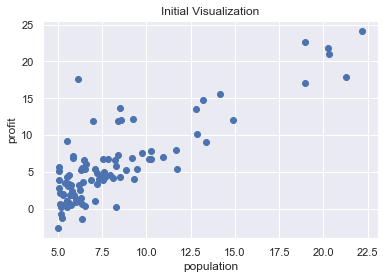

In [21]:
fig, ax = plt.subplots()
ax.scatter(df["popn"], df["profit"])
plt.title("Initial Visualization")
plt.xlabel("population")
plt.ylabel("profit")

Hay obviamente una fuerte relación positiva que parece más o menos lineal, aunque con mucha dispersión. No debería haber ninguna necesidad de escalado de características, ya que tanto la población como los beneficios se informan en unidades que los sitúan en el rango de "decenas".

### Gradient Descent

En esta parte, ajustarás los parámetros de regresión lineal a nuestro conjunto de datos utilizando *gradient descent*.

Según la documentación, el objeto de [regresión lineal estándar de scikit-learn]() es en realidad sólo un trozo de código de scipy que se envuelve para dar un objeto predictor. La función scipy antes mencionada es ``scipy.linalg.lstsq``, que sólo utiliza la ecuación Normal para calcular el minimizador analíticamente, y le avisará si la matriz relevante no es invertible. Esto es interesante ya que Andrew mencionó la ecuación normal casi como un pensamiento posterior al descenso en gradiente hasta el punto de implementar un algoritmo real para hacer regresión lineal, pero parece que en el mundo real el método por defecto es quizás la ecuación normal.

### Stochastic versus Batch Gradient Descent

Si realmente quieres obtener un descenso en gradiente en scikit-learn entonces el objeto relevante se llama ``SGDRegressor`` (o para problemas de clasificación ``SGDClassifier`` - la clasificación en donde sus etiquetas son discretas o categorícas.). El *SGD* significa descenso por gradiente estocástico, por lo que no es exactamente lo mismo que lo que Andrew cubre en su clase, aunque lo discute en las notas reales del *Stanford CS299*. En Coursera menciona que usar cada punto de datos de su ejemplo de entrenamiento para computar $\frac{\partial J}{\partial \Theta_{j}}$ en cada iteración de *GD* se llama descenso de gradiente por lotes, pero no detalla las alternativas, una de las cuales es el descenso de gradiente estocástico. Así que permítanme citar sus notas de clase reales:

 - En [descenso de gradiente estocástico], repetidamente corremos a través del conjunto de entrenamiento, y cada vez que encontramos un ejemplo de entrenamiento, actualizamos los parámetros de acuerdo con el gradiente de error con respecto a ese único ejemplo de entrenamiento.
 
De acuerdo con [esta respuesta de SO](https://stackoverflow.com/questions/34469237/linear-regression-and-gradient-descent-in-scikit-learn-pandas), el descenso del gradiente del lote no se utiliza con frecuencia en la práctica:
 - Si usted puede descomponer su función de pérdida en términos aditivos, entonces se sabe que el enfoque estocástico se comporta mejor... y si usted puede ahorrar suficiente memoria - el método OLS es más rápido y más fácil.
 
Y para más información sobre la diferencia entre lote versus estocástico, consulte esta [pregunta de quora](https://www.quora.com/Whats-the-difference-between-gradient-descent-and-stochastic-gradient-descent).

### Herramientas en sklearn para el descenso en pendiente estocástica

Con el objeto ``SGDRegressor`` es necesario configurar explícitamente la función de costo para que sea un error cuadrado y decirle que no utilice ninguna "penalización" (lo que Andrew aún no ha discutido, pero es esencialmente otra forma de influir en la hipótesis específica que devuelve el algoritmo ML).

De la [documentación oficial de scikit-learn](https://scikit-learn.org/stable/modules/sgd.html#sgd):
 - El descenso por gradiente estocástico es un enfoque simple pero muy eficaz para ajustar los modelos lineales. Es particularmente útil cuando el número de muestras (y el número de características) es muy grande. Las clases SGDClassifier y SGDRegressor proporcionan funcionalidad para ajustar modelos lineales de clasificación y regresión utilizando diferentes funciones de pérdida (convexas) y diferentes penalizaciones. Por ejemplo, con loss="log", SGDClassifier se ajusta a un modelo de regresión logística....

Primero tenemos que instanciar el objeto de ajuste, diciéndole cuál es nuestra función de coste - en nuestro caso, el coste es un error cuadrado. También podríamos instanciarlo con una función de penalización aquí, pero no los estamos usando, así que en lugar de eso establecemos ``None`` ya que el valor por defecto es en realidad ``L2`` de penalización o "regularización" (no se preocupe por eso por ahora).

In [22]:
from sklearn.linear_model import SGDRegressor

# Crear una instancia de SGDClassifier que tendrá métodos para hacer nuestro ajuste de regresión lineal por descenso de gradiente.
fitter = SGDRegressor(loss="squared_loss", penalty=None)
fitter

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

Para hacer un ajuste, el objeto SGDClassifier querrá ver un array, X
que contiene tu tabla de características para el conjunto de entrenamiento, así como un vector, y La etiqueta, es decir, el valor y de cada uno de los elementos del conjunto de entrenamiento. De nuestro conjunto de datos HW:

In [23]:
X = df.as_matrix(columns=["popn"])  # SGDRegressor es muy particular en la entrada "X" e insiste en una verdadera matriz 
y = df["profit"].tolist() # Esta es la variable que queremos predecir, el SGDRegressor espera un objeto vectorial

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


[Un rápido pero importante aparte: en clase cuando Andrew escribe X para la matriz de datos normalmente quiere decir esto para incluir una columna de todas las que se encuentran en $\Theta_{0}$ (el término de intercepción). Al usar todas estas encantadoras herramientas de sklearn no es necesario incluir esta columna explícitamente en tu Xse creará para ti.]

Ahora realmente hacemos el ajuste AKA ejecutar el descenso en pendiente llamando a un método de nuestro objeto SGDRegressor. Tenga en cuenta que la llamada a este método no devolverá nada que ver con el ajuste, sino que toda la información de ajuste se almacenará como atributos del objeto.

In [24]:
fitter.fit(X, y) # Hacer el ajuste llamando a un método de nuestro objeto

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

Puede que veas algunos nombres que parecen corresponderse con las conferencias de Andrés, como *alfa* y *épsilon*. Pero en realidad ``SGDRegressor`` sólo está jugando contigo y todos ellos tienen significados diferentes a los que Andrew mencionó. Aquí hay un par de "gotchas". Además este tipo se implementa como una herramienta de bastante alto nivel por lo que no se exponen todas las entrañas de la pendiente de descenso que se acaba de realizar. Esto significa que no podemos, por ejemplo, trazar la función de coste J en función del número de iteraciones.

En cualquier caso, el ajuste está hecho y podemos llamar al método de ``predict`` del objeto fittng para usar realmente la hipótesis seleccionada en la predicción de nuevos datos. Por ejemplo:

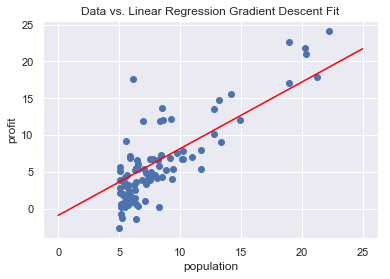

In [25]:
xs = list(range(0, 26, 1))
xs = np.array(xs).reshape(-1, 1)

new_ys = fitter.predict(xs)

fig, ax = plt.subplots()
ax.scatter(df["popn"], df["profit"])
plt.xlabel("population")
plt.title("Data vs. Linear Regression Gradient Descent Fit")
plt.ylabel("profit")
ax.plot(xs, new_ys, color="red")

A primera vista diría que esto fue una especie de trabajo de *@#¢∞¢* y que una intercepción un poco más pequeña con una pendiente positiva un poco mayor mejoraría nuestro ajuste. ¿Cuál es la razón de esta porquería? Bueno, esta [respuesta de SE](https://datascience.stackexchange.com/questions/6676/scikit-learn-getting-sgdclassifier-to-predict-as-well-as-a-logistic-regression) en la que alguien se topó con el mismo problema fue de gran ayuda en la resolución de problemas. Resulta que una [buena regla empírica](https://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use) para el número de iteraciones sobre el conjunto de entrenamiento es $n\_iter = np.ceil(10**6 / n)$ para obtener la convergencia. Vamos a probarlo:

In [26]:
fitter.n_iter = np.ceil(10**6 / len(y))
fitter.fit(X, y) #  Hacer el ajuste llamando a un método de nuestro objeto

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=10310.0, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

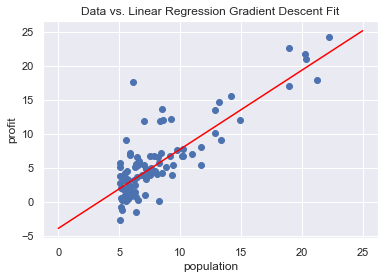

In [27]:
xs = list(range(0, 26, 1))
xs = np.array(xs).reshape(-1, 1)

new_ys = fitter.predict(xs)

fig, ax = plt.subplots()
ax.scatter(df["popn"], df["profit"])
plt.xlabel("population") 
plt.ylabel("profit") 
plt.title("Data vs. Linear Regression Gradient Descent Fit")
ax.plot(xs, new_ys, color="red")

Sí, parece que ese era el problema. Usando los ajustes por defecto, se detuvo el algoritmo después de que sólo $n\_iter = 5$ corriera a través del conjunto completo de entrenamiento, que para este conjunto de datos asciende a sólo 500 pasos en lugar de los 1 millón recomendados!

### Comparación con el método normal
En aras de la comparación, veamos cómo funcionaría el método de la ecuación normal. Recordemos que la herramienta de regresión lineal más utilizada en ``sklearn`` es el objeto ``LinearRegression``, y que en realidad está utilizando el método normal. La arquitectura de esta clase es súper similar a la que acabamos de usar con el ``SGDRegressor``:

In [28]:
from sklearn.linear_model import LinearRegression
norm_eqn = LinearRegression()
norm_eqn.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

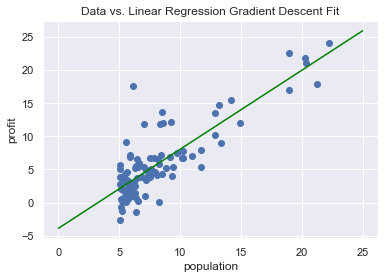

In [29]:
new_ys = norm_eqn.predict(xs)

fig, ax = plt.subplots()
ax.scatter(df["popn"], df["profit"])
plt.xlabel("population")
plt.ylabel("profit") 
plt.title("Data vs. Linear Regression Gradient Descent Fit")
ax.plot(xs, new_ys, color="green")

Sí, eso es bastante bueno y concuerda bastante bien con el SGD optimizado.

### Escalado de características
Como nota lateral, ``SGD`` es sensible al escalado de características al igual que el ``GD`` por lotes, por lo que cuando sea necesario podrá utilizar este [súper ingenioso juguete](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html):

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Este tipo tiene un método de ``fit`` que, en lugar de ajustar un modelo en el sentido convencional, calcula y guarda la media y la varianza de la muestra para cada característica de la matriz de entrada *X* y luego usa esos valores para impulsar su método de transformación en cualquier dato que le des. Es decir, usted ajusta ``fit`` su objeto transformador con sus datos de entrenamiento, y luego, por supuesto, *transforma* esos mismos datos y cualquier punto de datos futuro que pueda tener antes de alimentar su algoritmo ML de su elección.

In [31]:
scaler.fit(X)  # Entrena el objeto del transformador para que sepa qué significa y qué varianzas usar
X_transformed = scaler.transform(X)  # transforma tus datos de entrenamiento en preparación para algunos de los mejores algoritmos de ML

In [32]:
X[0], X_transformed[0]  # Un ejemplo de la transformación.

(array([6.1101]), array([-0.53240565]))

Visualización de la función de costes
Para entender mejor la función de costo $J(\theta)$, ahora trazarás el costo sobre una cuadrícula bidimensional de valores $\theta_0$ y $\theta_1$.

Necesitaremos codificar el modelo lineal, pero para calcular la suma de los errores cuadrados (pérdida de mínimos cuadrados) podemos tomar prestado un trozo de código de sklearn:

In [33]:
from sklearn.metrics import mean_squared_error as mse

In [34]:
xvals = df["popn"]
yvals = df["profit"]
def predict_y(thetas, xs):
    ''' Predecir y desde un modelo lineal de primer orden en x.'''
    ys = thetas[0] + thetas[1]*xs
    return ys

Echa un vistazo a esta [excelente respuesta](https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib/9170879#9170879) de desbordamiento de pila para un ejemplo rápido de gráficos de superficie en matplotlib. Básicamente estamos copiando y pegando lo que hizo ese tipo. La función de la malla toma dos vectores y crea el espacio de que es su producto exterior. Está devolviendo una matriz para $\theta_0$ que nos dice en cada punto de una cuadrícula (producto externo) el valor que toma - y el mismo tipo de matriz para $\theta_1$.

In [35]:
th0 = np.arange(-15.0, 15.0, 0.5)
th1 = np.arange(-1, 5, 0.5)
TH0, TH1 = np.meshgrid(th0, th1)

In [36]:
Js = np.array([mse(yvals, predict_y([th0, th1], xvals)) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
Js = Js.reshape(TH0.shape)

Text(0.5,0,'J')

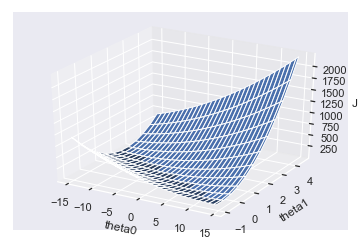

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(TH0, TH1, Js)
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("J")

Text(0.5,1,'Simplest default with labels')

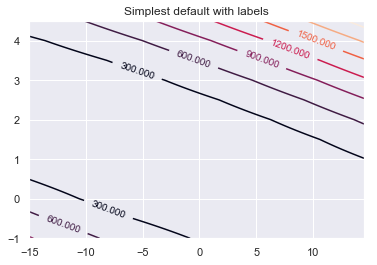

In [38]:
plt.figure()
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')

### Resumen del ejercicio
La Regresión Lineal para ajustarse a la forma típica de la hipótesis lineal se puede hacer con el degradador SGDR, en el que se especifica la función de pérdida y la penalización específicas y se utiliza el descenso de gradiente estocástico (SGD) para realizar la adaptación. En SGD se ejecuta repetidamente a través del conjunto de entrenamiento un punto de datos a la vez y se actualizan los parámetros de acuerdo con el gradiente de error con respecto a cada punto de datos individual. Asegúrese de ajustar el niter lo suficientemente alto como para obtener una buena convergencia. La clase LinearRegression es menos general y siempre utiliza la menor pérdida de cuadrados, y utiliza el método analítico de la Ecuación Normal para resolver el ajuste. En todos los casos la herramienta StandardScaler automatiza el escalado de la característica (por medio y varianza) para usted.

# Hiperparámetros y validación del modelo

En la sección anterior, vimos la receta básica para aplicar un modelo de aprendizaje supervisado de máquina:
1. Elija una clase de modelo
2. Elija los hiperparámetros del modelo
3. Adaptar el modelo a los datos de entrenamiento
4. Utilice el modelo para predecir etiquetas para nuevos datos

Las dos primeras piezas de esto -la elección del modelo y la elección de los hiperparámetros- son quizás la parte más importante de la utilización eficaz de estas herramientas y técnicas. Para tomar una decisión informada, necesitamos una manera de *validar* que nuestro modelo y nuestros hiperparámetros encajan bien con los datos. Si bien esto puede parecer simple, hay algunas trampas que usted debe evitar para hacer esto de manera efectiva.

### Pensando en la Validación de Modelos
En principio, la validación del modelo es muy simple: después de elegir un modelo y sus hiperparámetros, podemos estimar su eficacia aplicándolo a algunos de los datos de entrenamiento y comparando la predicción con el valor conocido.
Las siguientes secciones muestran primero un enfoque ingenuo para la validación de modelos y por qué falla, antes de explorar el uso de conjuntos de holdout y validación cruzada para una evaluación de modelos más robusta.

#### Validación de modelos en sentido contrario
Vamos a demostrar el enfoque ingenuo de la validación utilizando los datos de Iris, que vimos en la sección anterior. Comenzaremos por cargar los datos:

In [39]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

A continuación elegimos un modelo e hiperparámetros. Aquí usaremos un clasificador k-neighbors con ``n_neighbors=1``. Se trata de un modelo muy sencillo e intuitivo que dice que "la etiqueta de un punto desconocido es la misma que la de su punto de entrenamiento más cercano".

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

Luego entrenamos el modelo y lo usamos para predecir etiquetas de datos que ya conocemos:

In [41]:
model.fit(X, y)
y_model = model.predict(X)

Finalmente, calculamos la fracción de puntos correctamente etiquetados:

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

Vemos una puntuación de precisión de 1,0, lo que indica que el 100% de los puntos fueron correctamente etiquetados por nuestro modelo! Pero, ¿es esto realmente medir la precisión esperada? ¿Realmente hemos encontrado un modelo que esperamos que sea correcto el 100% de las veces?
Como habrás deducido, la respuesta es no. De hecho, este enfoque contiene un defecto fundamental: entrena y evalúa el modelo sobre los mismos datos. Además, el modelo vecino más cercano es un estimador basado en instancias que simplemente almacena los datos de entrenamiento y predice las etiquetas comparando los nuevos datos con estos puntos almacenados: ¡excepto en casos artificiosos, obtendrá una precisión del 100% cada vez!

#### Validación de modelos de la manera correcta: Conjuntos de retención
Entonces, ¿qué se puede hacer? Un mejor sentido del rendimiento de un modelo se puede encontrar usando lo que se conoce como un conjunto de retención: es decir, retenemos algún subconjunto de los datos de la formación del modelo, y luego usamos este conjunto de retención para comprobar el rendimiento del modelo. Esta división se puede hacer usando la utilidad ``train_test_split`` en Scikit-Learn:

In [ ]:
from sklearn.cross_validation import train_test_split
# dividir los datos con un 50% en cada conjunto
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# encajar el modelo en un conjunto de datos
model.fit(X1, y1)

# evaluar el modelo sobre el segundo conjunto de datos
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

Vemos aquí un resultado más razonable: el clasificador del vecino más cercano tiene una precisión de aproximadamente el 90% en este conjunto de retención. El conjunto de retención es similar a los datos desconocidos, porque el modelo no lo ha "visto" antes.

# Validación Cruzada

### Validación de modelos mediante validación cruzada
Una desventaja de usar un conjunto de retenciones para la validación del modelo es que hemos perdido una porción de nuestros datos en el entrenamiento del modelo. En el caso anterior, la mitad del conjunto de datos no contribuye a la formación del modelo! Esto no es óptimo y puede causar problemas, especialmente si el conjunto inicial de datos de entrenamiento es pequeño.
Una manera de abordar este problema es utilizar la validación cruzada, es decir, realizar una secuencia de ajustes en la que cada subconjunto de los datos se utilice como un conjunto de formación y como un conjunto de validación. Visualmente, podría parecerse a esto:

![](figures/05.03-2-fold-CV.png)

Aquí hacemos dos pruebas de validación, usando alternativamente cada mitad de los datos como un conjunto de retención.
Usando los datos divididos de antes, podríamos implementarlos así:

In [ ]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

Lo que resulta son dos puntuaciones de precisión, que podríamos combinar (por ejemplo, tomando la media) para obtener una mejor medida del rendimiento del modelo global.
Esta forma particular de validación cruzada es una *validación cruzada doble*, es decir, una en la que hemos dividido los datos en dos conjuntos y usado cada uno de ellos como un conjunto de validación.

Podríamos ampliar esta idea para usar aún más ensayos y más pliegues en los datos; por ejemplo, aquí hay una representación visual de una validación cruzada quíntuple:

![](figures/05.03-5-fold-CV.png)

Aquí dividimos los datos en cinco grupos, y usamos cada uno de ellos a su vez para evaluar el ajuste del modelo en los otros 4/5 de los datos.
Esto sería bastante tedioso de hacer a mano, así que podemos usar la rutina de conveniencia ``cross_val_score`` de Scikit-Learn para hacerlo sucintamente:

In [ ]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=5)

La repetición de la validación a través de diferentes subconjuntos de los datos nos da una idea aún mejor del rendimiento del algoritmo.

Scikit-Learn implementa un número de útiles esquemas de validación cruzada que son útiles en situaciones particulares; estos son implementados a través de iteradores en el módulo ``cross_validation``.
Por ejemplo, podríamos desear ir al caso extremo en el que nuestro número de pliegues es igual al número de puntos de datos: es decir, nos entrenamos en todos los puntos menos uno en cada prueba.
Este tipo de validación cruzada se conoce como validación cruzada *dejar una salida* y se puede utilizar de la siguiente manera:

In [ ]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

Debido a que tenemos 150 muestras, el resultado de la validación cruzada es de 150 ensayos, y la puntuación indica si la predicción fue exitosa (1.0) o no (0.0). Si se toma la media de estos datos, se obtiene una estimación de la tasa de error:

In [ ]:
scores.mean()

Otros esquemas de validación cruzada pueden utilizarse de forma similar.
Para una descripción de lo que está disponible en Scikit-Learn, use IPython para explorar el submódulo ``sklearn.cross_validation`` o eche un vistazo a la documentación de [validación cruzada de Scikit-Learn en línea](http://scikit-learn.org/stable/modules/cross_validation.html).

#  Data Cleaning

Recuerda que lo primero siempre cuando te enfrentas a una base de datos o un archivo, es revisar si este documento esta *formatiado* o tienes que hacer un par de areglos antes de comenzar. Para esto podemos hacer un pre-procesamiento con scikit-learn: ``sklearn.preproccessing`` (Ve la [documentación aca](https://scikit-learn.org/stable/modules/preprocessing.html)). El paquete sklearn.preprocessing proporciona varias funciones de utilidad comunes y clases de transformador para cambiar los vectores de características en bruto en una representación que es más adecuada para los estimadores de flujo descendente.
En general, los algoritmos de aprendizaje se benefician de la estandarización del conjunto de datos. Si algunos valores atípicos están presentes en el conjunto, los escaladores o transformadores robustos son más apropiados. El comportamiento de los diferentes escaladores, transformadores y normalizadores en un conjunto de datos que contiene valores atípicos marginales se destaca en Comparar el [efecto de los diferentes escaladores en los datos con los valores atípicos](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py).

## Estandarización, o remoción de promedios y escalado de varianza

La **estandarización** de los conjuntos de datos es un **requisito común** para muchos estimadores de aprendizaje automático implementados en scikit-learn; podrían comportarse mal si las características individuales no se parecen más o menos a los datos estándar distribuidos normalmente: Gaussiano con **cero media y varianza unitaria**.

En la práctica, a menudo ignoramos la forma de la distribución y simplemente transformamos los datos para centrarlos eliminando el valor medio de cada característica, y luego los escalamos dividiendo las características no constantes por su desviación estándar.

Por ejemplo, muchos elementos utilizados en la función objetiva de un algoritmo de aprendizaje (como el núcleo RBF de las máquinas vectoriales de soporte o los regularizadores l1 y l2 de los modelos lineales) asumen que todas las características están centradas en torno a cero y tienen varianza en el mismo orden. Si una característica tiene una varianza que es de órdenes de magnitud mayores que otras, podría dominar la función de objetivo y hacer que el estimador no pueda aprender de otras características correctamente como se esperaba.
La escala de la función proporciona una manera rápida y fácil de realizar esta operación en un único conjunto de datos similar a un arreglo:

In [ ]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X_train)
X_scaled

Los datos escalonados tienen una media cero y una varianza unitaria:

In [ ]:
X_scaled.mean(axis=0)

In [ ]:
X_scaled.std(axis=0)

El módulo de preprocesamiento proporciona además una clase de utilidad ``StandardScaler`` que implementa la API del transformador para calcular la media y la desviación estándar en un conjunto de entrenamiento para poder volver a aplicar posteriormente la misma transformación en el conjunto de pruebas. Esta clase es por lo tanto adecuada para su uso en los primeros pasos de un ``sklearn.pipeline``:

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

In [ ]:
scaler.mean_, scaler.scale_  

In [ ]:
scaler.transform(X_train) 

La instancia del escalador se puede utilizar en los nuevos datos para transformarlos de la misma forma que en el equipo de entrenamiento:

In [ ]:
X_test = [[-1., 1., 0.]]
scaler.transform(X_test) 

Es posible desactivar el centrado o la escala pasando ``with_mean=False`` o ``with_std=False`` al constructor de ``StandardScaler``.

### Escalar las características a un rango

Una estandarización alternativa es escalar las características para que estén entre un valor mínimo y máximo dado, a menudo entre cero y uno, o para que el valor absoluto máximo de cada característica se ajuste al tamaño de la unidad. Esto se puede lograr utilizando ``MinMaxScaler`` o ``MaxAbsScaler``, respectivamente.
La motivación para usar esta escala incluye la robustez de las desviaciones estándar muy pequeñas de las características y la preservación de las entradas cero en datos dispersos.
He aquí un ejemplo para escalar una matriz de datos de juguetes al rango de $[0,1]$:

In [ ]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

La misma instancia del transformador se puede aplicar a algunos nuevos datos de prueba no vistos durante la llamada de ajuste: se aplicarán las mismas operaciones de escalado y desplazamiento para que sean coherentes con la transformación realizada en los datos del tren:

In [ ]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

Es posible introspeccionar los atributos del escalador para conocer la naturaleza exacta de la transformación aprendida en los datos de entrenamiento:

In [ ]:
min_max_scaler.scale_, min_max_scaler.min_ 

Si a ``MinMaxScaler`` se le da un explícito ``feature_range=(min, max)`` la fórmula completa es:

$X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))$

$X_scaled = X_std * (max - min) + min$

``MaxAbsScaler`` funciona de forma muy similar, pero se escala de forma que los datos de entrenamiento se encuentran dentro del rango $[-1, 1]$ dividiéndolos entre el valor máximo más alto de cada característica. Está pensado para datos que ya están centrados en cero o datos escasos.
A continuación se muestra cómo utilizar los datos de juguete del ejemplo anterior con este escarificador:

In [ ]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

In [ ]:
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs 

In [ ]:
max_abs_scaler.scale_  

Al igual que con la escala, el módulo proporciona funciones de conveniencia ``minmax_scale`` y ``maxabs_scale`` si no desea crear un objeto.

### Escalado de datos escasos

Centrar los datos dispersos destruiría la estructura de dispersión de los datos y, por lo tanto, rara vez es algo sensato. Sin embargo, puede tener sentido escalar entradas dispersas, especialmente si las características están en escalas diferentes.
``MaxAbsScaler`` y ``maxabs_scale`` fueron diseñados específicamente para escalar datos dispersos, y son la forma recomendada de hacerlo. Sin embargo, ``scale`` y ``StandardScaler`` pueden aceptar matrices ``scipy.sparse`` como entrada, siempre y cuando ``with_mean=False`` se pase explícitamente al constructor. De lo contrario, se elevará un ``ValueError``, ya que el centrado silencioso rompería la dispersión y a menudo bloquearía la ejecución al asignar cantidades excesivas de memoria de forma involuntaria. ``RobustScaler`` no se puede instalar en entradas dispersas, pero se puede utilizar el método de transformación en entradas dispersas.
Tenga en cuenta que los escaladores aceptan tanto el formato de filas dispersas comprimidas como el de columnas dispersas comprimidas (consulte ``scipy.sparse.csr_matrix`` y ``scipy.sparse.csc_matrix``). Cualquier otra entrada dispersa se convertirá a la representación de Filas dispersas comprimidas. Para evitar copias de memoria innecesarias, se recomienda elegir la representación CSR o CSC aguas arriba.
Finalmente, si se espera que los datos centrados sean lo suficientemente pequeños, otra opción es convertir explícitamente la entrada a una matriz usando el método de matriz de matriz dispersa.

### Escalado de datos con valores atípicos

Si sus datos contienen muchos valores atípicos, es probable que el escalamiento utilizando la media y la varianza de los datos no funcione muy bien. En estos casos, puede utilizar ``robust_scale`` y ``RobustScaler`` como sustituto sin cita previa. Utilizan estimaciones más sólidas para el centro y el rango de sus datos.


## Normalización

La normalización es el proceso de escalado de muestras individuales para que tengan una norma unitaria. Este proceso puede ser útil si planea usar una forma cuadrática como el punto-producto o cualquier otro núcleo para cuantificar la similitud de cualquier par de muestras.
Esta suposición es la base del Modelo Vectorial Espacial que se utiliza a menudo en la clasificación de textos y contextos de agrupación.
La función normalizar proporciona una forma rápida y sencilla de realizar esta operación en un único conjunto de datos similar a un array, ya sea utilizando las normas $l_1$ o $l_2$:

In [ ]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized 

El módulo de preprocesamiento proporciona además una clase de utilidad ``Normalizer`` que implementa la misma operación utilizando la API del transformador (aunque el método de ajuste es inútil en este caso: la clase es apátrida ya que esta operación trata las muestras de forma independiente).
Esta clase es por lo tanto adecuada para su uso en los primeros pasos de un ``sklearn.pipeline``:

In [ ]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

La instancia del normalizador puede ser utilizada en vectores de muestra como cualquier transformador:

In [ ]:
normalizer.transform(X)         

In [ ]:
normalizer.transform([[-1.,  1., 0.]])  

### Saludos!